December.6  list 25

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.api import VAR

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)

In [5]:
data = web.DataReader(name=['DTB6','T10Y2Y'], data_source='fred', start='1995-01-01',end='2023-12-31')

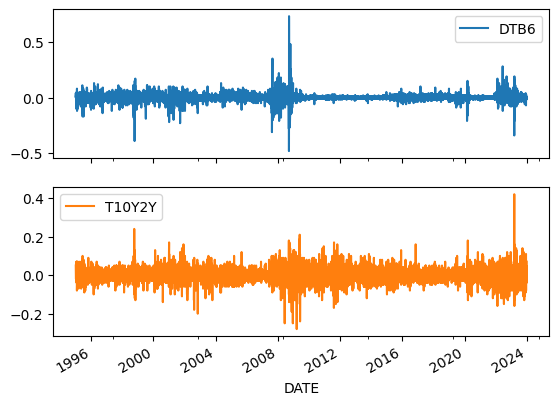

In [7]:
y=data.diff().dropna()
y.plot(subplots=True)
plt.show()

In [8]:
mod = VAR(y, missing='drop')

res = mod.fit(maxlags=1, ic=None, trend='c')

res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 13, Dec, 2024
Time:                     18:05:07
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -13.2883
Nobs:                     6947.00    HQIC:                  -13.2922
Log likelihood:           26468.6    FPE:                1.68425e-06
AIC:                     -13.2942    Det(Omega_mle):     1.68280e-06
--------------------------------------------------------------------
Results for equation DTB6
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000765         0.000429           -1.784           0.074
L1.DTB6           0.077315         0.012319            6.276           0.000
L1.T10Y2Y        -0.046042         0.011818           -3.896           0.000


In [9]:
res.test_whiteness(nlags=10,signif=0.05,adjusted=True).summary()

Test statistic,Critical value,p-value,df
184.0,51.00,0.000,36


The $p$-value $<0.05$ $⇒$ we rejct $H_0$ $⇒$ there is serial correlation

In [18]:
mod = VAR(y, missing='drop')
res = mod.fit(maxlags=10, ic=None, trend='c')
res.test_whiteness(nlags=12,signif=0.05,adjusted=True).summary()

Test statistic,Critical value,p-value,df
12.57,15.51,0.128,8


In the model with $10$ lags, there is no serial correlation

Question: How to choose the number of nlags

In [19]:
res.forecast(y=y.tail(res.k_ar).values, steps=10)

array([[-0.00750384,  0.00120771],
       [-0.00137878, -0.00096403],
       [ 0.0007496 , -0.00059046],
       [ 0.00051757, -0.00213445],
       [-0.00355724, -0.00097595],
       [-0.0010045 , -0.00014818],
       [ 0.00042364,  0.00073854],
       [-0.00130482,  0.0001344 ],
       [-0.00063239, -0.00088686],
       [-0.0004355 ,  0.00097121]])

In [17]:
mod = VAR(y, missing='drop')

res = mod.fit(maxlags=2, ic='bic', trend='c')

res.k_ar

1

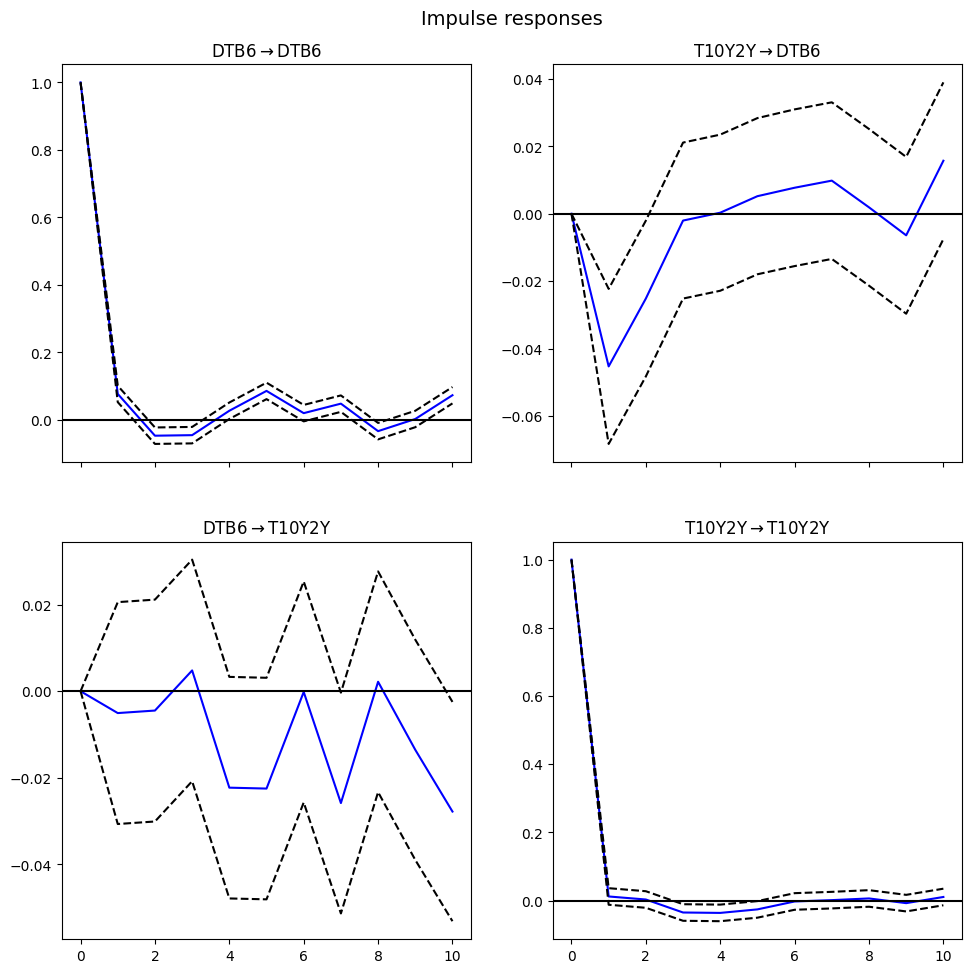

In [20]:
res.irf(periods=10).plot(signif=0.05)
plt.show()

In [21]:
res.test_causality(caused= ['DTB6'], causing=['T10Y2Y'], signif=0.01).summary()

Test statistic,Critical value,p-value,df
2.260,2.322,0.012,"(10, 13834)"


we reject $H_0$ $⇒$ 'T10Y2Y' has impact onto 'DTB6'